In [6]:
%matplotlib inline
import sqlite3
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [9]:
conn = sqlite3.connect("Resources/Hawaii.sqlite")

In [10]:
cur = conn.cursor()

In [12]:
#Obtain data from cursor via loop
cur = conn.execute("SELECT name FROM sqlite_master WHERE type='table'")
rows = cur.fetchall()

for row in rows:
    print(row)


('measurement',)
('station',)


In [13]:
# Query All Records in the the Database
WStation_data= pd.read_sql("SELECT station FROM station", conn)
# Preview the Data
WStation_data.head(10)

,station
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838
5,USC00519523
6,USC00519281
7,USC00511918
8,USC00516128


In [14]:

# Query All Records in the the Database
MEAS_data = pd.read_sql("select * from measurement where date>= Date((Select max(date) from measurement),'-12 months') ", conn)
# Preview the Data
MEAS_data.head(10)

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,2365,USC00519397,2016-08-24,0.08,79.0
2,2366,USC00519397,2016-08-25,0.08,80.0
3,2367,USC00519397,2016-08-26,0.00,79.0
4,2368,USC00519397,2016-08-27,0.00,77.0
5,2369,USC00519397,2016-08-28,0.01,78.0
6,2370,USC00519397,2016-08-29,0.00,78.0
7,2371,USC00519397,2016-08-30,0.00,79.0
8,2372,USC00519397,2016-08-31,0.13,80.0
9,2373,USC00519397,2016-09-01,0.00,81.0


In [15]:
# Query All Records in the the Database
MEAS_data = pd.read_sql("select Date, Prcp from measurement Where date between Date((Select max(date) from measurement),'-12 months')  and (Select max(date) from measurement) order by date asc", conn)

#make Date the Index
MEAS_data.set_index('date',inplace=True)

# Preview the Data
# MEAS_data
#MEAS_data.head()

MEAS_data.prcp

date
2016-08-23    0.00
2016-08-23    0.15
2016-08-23    0.05
2016-08-23     NaN
2016-08-23    0.02
2016-08-23    1.79
2016-08-23    0.70
2016-08-24    0.08
2016-08-24    2.15
2016-08-24    2.28
2016-08-24     NaN
2016-08-24    1.22
2016-08-24    2.15
2016-08-24    1.45
2016-08-25    0.08
2016-08-25    0.08
2016-08-25    0.00
2016-08-25    0.00
2016-08-25    0.21
2016-08-25    0.06
2016-08-25    0.11
2016-08-26    0.00
2016-08-26    0.03
2016-08-26    0.02
2016-08-26    0.04
2016-08-26    0.00
2016-08-26    0.01
2016-08-27    0.00
2016-08-27    0.18
2016-08-27    0.02
              ... 
2017-08-16    0.00
2017-08-16    0.07
2017-08-16    0.12
2017-08-16    0.42
2017-08-17    0.00
2017-08-17    0.05
2017-08-17    0.01
2017-08-17    0.13
2017-08-18    0.00
2017-08-18    0.00
2017-08-18    0.06
2017-08-18     NaN
2017-08-19    0.00
2017-08-19    0.00
2017-08-19     NaN
2017-08-19    0.09
2017-08-20    0.00
2017-08-20    0.01
2017-08-20     NaN
2017-08-21    0.00
2017-08-21    0.02
2017-08


# Plot the results using the DataFrame plot method

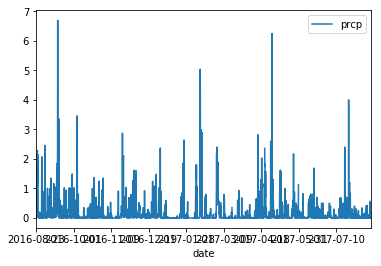

In [16]:
MEAS_data.plot()

# Summary Results

In [17]:
MEAS_data.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Query to calculate the total number of stations

In [19]:
# Query All Records in the the Database
WStation_Count = pd.read_sql("select count(distinct(station)) as'Stations'  from station  ", conn)
# Preview the Data
WStation_Count.set_index('Stations',inplace=True)
WStation_Count

""
Stations
9


# stations and observation counts in descending order

In [21]:
event_data = pd.read_sql("select m.Station,s.name, count(m.id) as 'observations' from measurement m join 'station' s on m.station=s.station group by m.station,s.name order by count(m.id) desc ", conn)

event_data

,station,name,observations
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


# station with the highest number of observations

## USC00519281 WAIHEE 837.5, HI US  2772 observations

# Query to retrieve the last 12 months of temperature observation data 

In [23]:
# Query All Records in the the Database
temp_data = pd.read_sql("select tobs from measurement Where date >= Date((Select max(date) from measurement),'-12 months')  order by date asc", conn)

#make Date the Index
#MEAS_data.set_index('date',inplace=True)


# temp_head (tobs)
temp_data.head()

,tobs
0,81.0
1,76.0
2,80.0
3,80.0
4,80.0


# Filter by the station with the highest number of observations

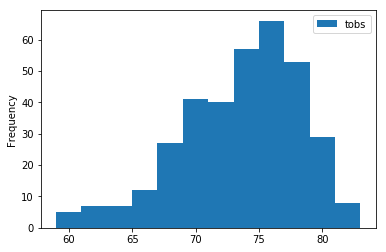

In [24]:
# Query All Records in the the Database
temp_data = pd.read_sql("select tobs from measurement Where station ='USC00519281' and date between Date((Select max(date) from measurement),'-12 months') and (Select max(date) from measurement) order by date asc", conn)

#make Date the Index
#MEAS_data.set_index('date',inplace=True)


# measure_data
temp_data.plot.hist(bins=12)